### Initialization

In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


### Junk for the light field 

In [2]:
# from topas2numpy import BinnedResult, read_ntuple
# x = BinnedResult('Readout-1000keV.bin')

In [3]:
from numpy import genfromtxt
my_data = genfromtxt('Bone_Scorer.csv', dtype=int, delimiter=',',skip_header=10)

In [4]:
x = my_data[:,3:].reshape([1024,32,53])

<IPython.core.display.Javascript object>


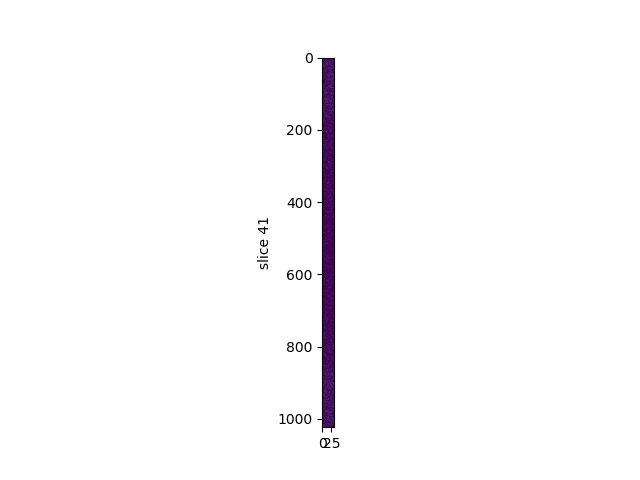

In [5]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax; self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2
        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()
    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()
    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()
        
fig, ax = plt.subplots(1, 1)

X = x

tracker = IndexTracker(ax, X)

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

In [18]:
# np.save('Bone_slice',X)

In [17]:
x = my_data[:,3:].reshape(1024,32,53)

<IPython.core.display.Javascript object>


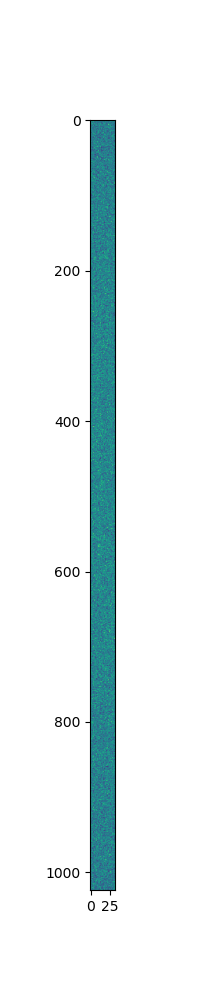

In [18]:
plt.figure(figsize= [2,10])
plt.imshow(np.sum(x,2))

<IPython.core.display.Javascript object>


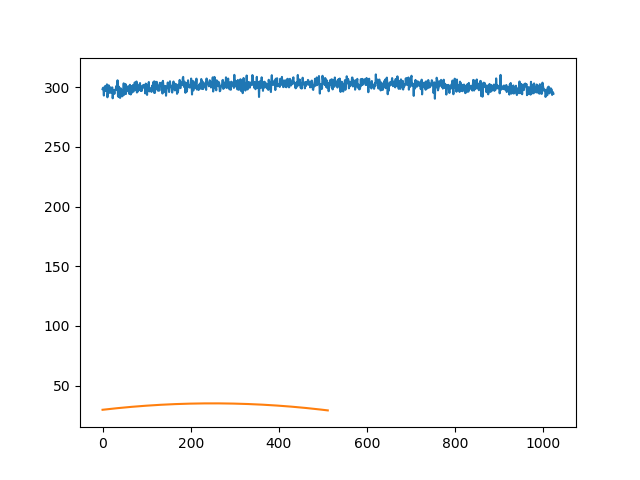

In [35]:

def smooth(x,window_len=50,window='flat'):

#     if x.ndim != 1:
#         raise ValueError, "smooth only accepts 1 dimension arrays."

#     if x.size < window_len:
#         raise ValueError, "Input vector needs to be bigger than window size."


#     if window_len<3:
#         return x


#     if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
#         raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y

plt.figure()
plt.plot(np.mean(np.sum(x,2),1))

fit = polyfit(np.arange(0,512),np.mean(np.sum(x,2),1)[::2],2)

fit[2] /= 10

plt.plot(polyval(fit,np.arange(0,512)))

In [36]:
print(fit)

[-8.63229252e-05  4.31027881e-02  2.97682238e+01]


### Junk for the many keV noise kernels

In [9]:
import glob
from numpy import genfromtxt

In [3]:
!rename -e 's/\d+/sprintf("%04d",$&)/e' -- *.csv

In [10]:
for ii,file in enumerate(sort(glob.glob('*keV.csv'))):
    
    my_data = genfromtxt(file, dtype=int, delimiter=',',skip_header=10)
    
    if not ii:
        
        print('does this work')
        
        full_kernel = np.zeros([len(glob.glob('*keV.csv')),1024,32,53])
        
    full_kernel[ii] = my_data[:,3:].reshape(1024,32,53)

does this work


/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: genfromtxt: Empty input file: "Readout_light_primary-1000keV.csv"
  This is separate from the ipykernel package so we can avoid doing imports until


IndexError: too many indices for array

In [168]:
full_kernel.shape

(16, 1024, 32, 53)

<IPython.core.display.Javascript object>


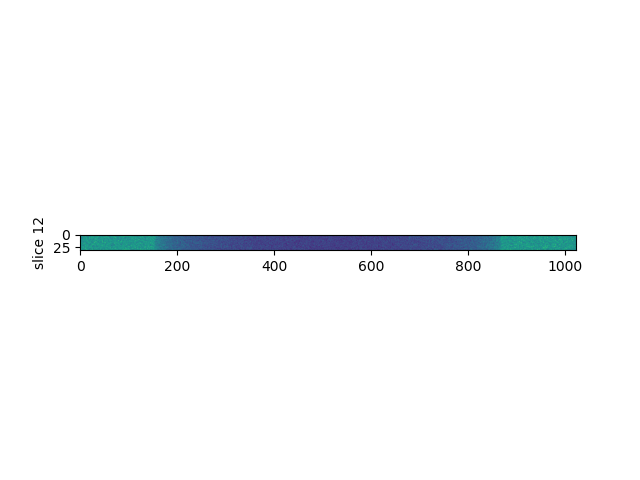

In [169]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax; self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2
        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()
    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()
    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()
        
fig, ax = plt.subplots(1, 1)

X = np.sum(full_kernel,3).T

tracker = IndexTracker(ax, X)

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

In [173]:
np.save('noise_kernel_int',full_kernel.astype(np.int8))

### Junk for the primary kernel 

In [1]:
import glob
from numpy import genfromtxt


In [13]:
!rename -e 's/\d+/sprintf("%04d",$&)/e' -- *.csv

In [ ]:
sorted(glob.glob('Readout_light_primary*keV.csv'))

In [15]:
for ii,file in enumerate(sorted(glob.glob('Readout_light_primary*keV.csv'))):
    
    my_data = genfromtxt(file, dtype=int, delimiter=',',skip_header=10)
    
    if ii == 0:
        
        full_kernel = np.zeros([len(glob.glob('Readout_light_primary*keV.csv')),1024,32,53])
        
    full_kernel[ii] = my_data[:,3:].reshape(1024,32,53)

In [6]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


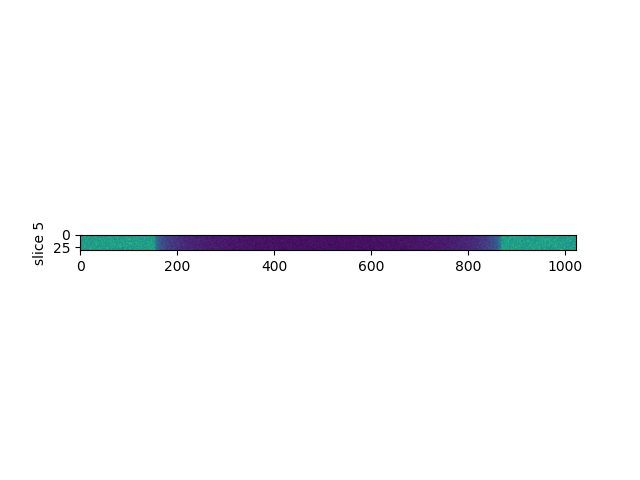

In [16]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax; self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2
        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()
    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()
    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()
        
fig, ax = plt.subplots(1, 1)

X = np.sum(full_kernel,3).T

tracker = IndexTracker(ax, X)

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

In [17]:
np.save('primary_kernel_int_larger',full_kernel.astype(np.int8))

In [6]:
im = np.load('noise_kernel_int.npy')

In [8]:
im.shape

(16, 1024, 32, 53)